In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')
data = data.drop(['id'], axis=1)

In [3]:
#General data info
data.head()

,CPU,throughput
0,0.696681,34363.802418
1,0.506458,26634.457286
2,0.497376,26241.442485
3,0.201114,11911.200427
4,0.098918,6131.169504


In [4]:
data.describe()

,CPU,throughput
count,3.000000e+03,3000.000000
mean,4.926350e-01,24796.765420
std,2.862701e-01,12819.241510
min,3.930454e-07,0.025548
25%,2.495636e-01,14481.630521
50%,4.952715e-01,26150.006179
75%,7.391214e-01,35969.703259
max,9.999153e-01,45051.815448


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
CPU           3000 non-null float64
throughput    3000 non-null float64
dtypes: float64(2)
memory usage: 47.0 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


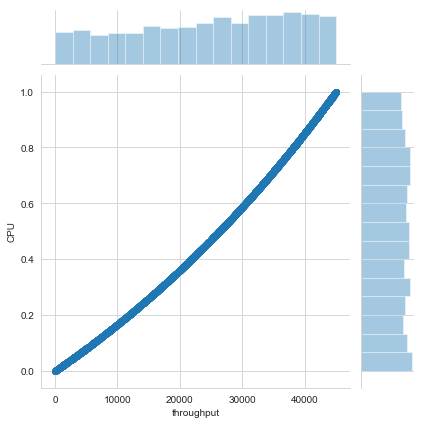

In [6]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


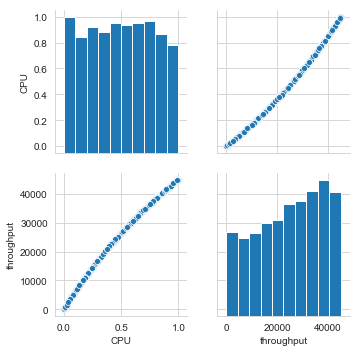

In [7]:
sns.pairplot(data)


In [8]:
data['throughput'].corr(data['CPU'])


0.9960036644381605

In [9]:
datalm = data


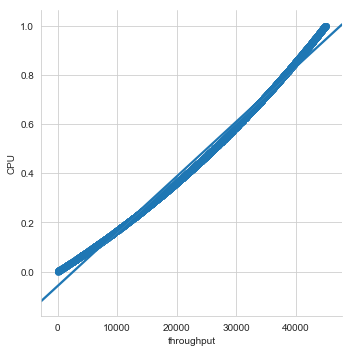

In [10]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [11]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
#Ridge Model
rm = Ridge(alpha=.5)
rm.fit(X_train,y_train)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
#Test data prediction
prediction = rm.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,0.722716,0.727458
1,0.213344,0.221446
2,0.122944,0.109673
3,0.872325,0.847679
4,0.559681,0.583934
5,0.706508,0.713811
6,0.946227,0.903563
7,0.695982,0.704879
8,0.200458,0.206032
9,0.072724,0.043625


Text(0, 0.5, 'Predicted Y')

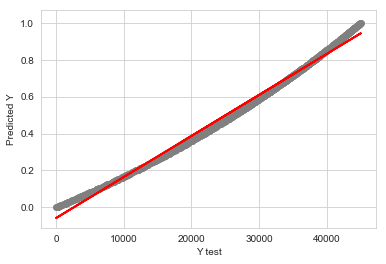

In [13]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


In [14]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))




MAE: 0.02198421801528768
MSE: 0.0006428844535154764
RMSE: 0.025355166209580966


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


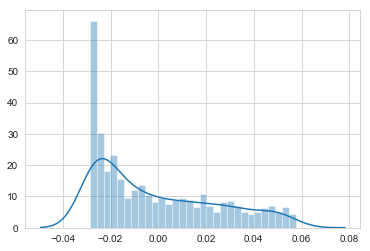

In [15]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [16]:
# save the model to disk
filename = '../models/ridgeReg_model.sav'
pickle.dump(rm, open(filename, 'wb'))